## Function Description
You’re tasked with optimising a four-variable black-box function that represents the yield of a chemical process in a factory. The function is typically unimodal, with a single peak where yield is maximised. 

The goal is to find the optimal combination of chemical inputs that delivers the highest possible yield, using systematic exploration and optimisation methods.

## Load and Prepare Data

In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel
from scipy.stats.qmc import Sobol
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load original dataset
X = np.load("../data/function_5/initial_inputs.npy")
y = np.load("../data/function_5/initial_outputs.npy")
d = X.shape[1] # dimension

print(f"original n: {len(X)}")
print()

# week 1 = initial

# week 2
x_new = np.array([[0.585595, 0.999249, 0.434293, 0.887074]])
y_new = np.array([1188.281516061163])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 3
x_new = np.array([[0.420590, 0.996060, 0.971482, 0.802719]])
y_new = np.array([2401.413366772183])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 4
x_new = np.array([[0.373757, 0.993232, 0.997743, 0.674669]])
y_new = np.array([2069.6676964237517])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# Week 5
x_new = np.array([[0.246338, 0.999049, 0.981816, 0.992182]])
y_new = np.array([4097.304364945996])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 6
x_new = np.array([[0.966979, 0.999402, 0.965556, 0.997924]])
y_new = np.array([7415.937224757126])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 7
x_new = np.array([[0.957413, 0.973676, 0.996459, 0.987152]])
y_new = np.array([7156.828003198299])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 8
x_new = np.array([[0.964875, 0.834412, 0.997934, 0.997400]])
y_new = np.array([5724.669266796069])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 9
x_new = np.array([[0.953237, 0.956151, 0.998687, 0.996097]])
y_new = np.array([7008.248314697704])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 10
x_new = np.array([[0.933497, 0.994333, 0.973185, 0.977814]])
y_new = np.array([6609.9025620512475])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 11
x_new = np.array([[0.992830, 0.981991, 0.939987, 0.995886]])
y_new = np.array([7118.314216887064])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 12
x_new = np.array([[0.968148, 0.991479, 0.968390, 0.977295]])
y_new = np.array([6990.743477838554])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# week 13
x_new = np.array([[0.967808, 0.983880, 0.969650, 0.970744]])
y_new = np.array([6774.127705891495])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

# final submission
x_new = np.array([[0.955030, 0.988702, 0.979232, 0.985086]])
y_new = np.array([7043.194862435561])

X = np.vstack((X, x_new))
y = np.concatenate((y, y_new))

np.set_printoptions(suppress=True, precision=6)
print("X:\n", X)
print()
print("y:\n", y)
print()
print("n: ", len(y))
print()
idx_best = np.argmax(y)
print(f"current maximum:\nn: {idx_best+1}\ny: {y[idx_best]}\nX: {X[idx_best]}")

original n: 20

X:
 [[0.191447 0.038193 0.607418 0.414584]
 [0.758653 0.536518 0.656    0.360342]
 [0.43835  0.80434  0.210245 0.151295]
 [0.706051 0.534192 0.264243 0.482088]
 [0.836478 0.19361  0.663893 0.785649]
 [0.683432 0.118663 0.829046 0.567577]
 [0.553621 0.66735  0.323806 0.81487 ]
 [0.352356 0.322242 0.116979 0.473113]
 [0.153786 0.729382 0.422598 0.443074]
 [0.463442 0.630025 0.107906 0.957644]
 [0.677491 0.35851  0.479592 0.07288 ]
 [0.583973 0.147243 0.348097 0.428615]
 [0.306889 0.316878 0.622634 0.095399]
 [0.511142 0.817957 0.72871  0.112354]
 [0.438933 0.774092 0.378167 0.933696]
 [0.224189 0.84648  0.879484 0.878516]
 [0.725262 0.47987  0.088947 0.75976 ]
 [0.355482 0.639619 0.417618 0.122604]
 [0.119879 0.86254  0.643331 0.849804]
 [0.126885 0.15343  0.770162 0.190518]
 [0.585595 0.999249 0.434293 0.887074]
 [0.42059  0.99606  0.971482 0.802719]
 [0.373757 0.993232 0.997743 0.674669]
 [0.246338 0.999049 0.981816 0.992182]
 [0.966979 0.999402 0.965556 0.997924]
 [0.9

## Visualisation

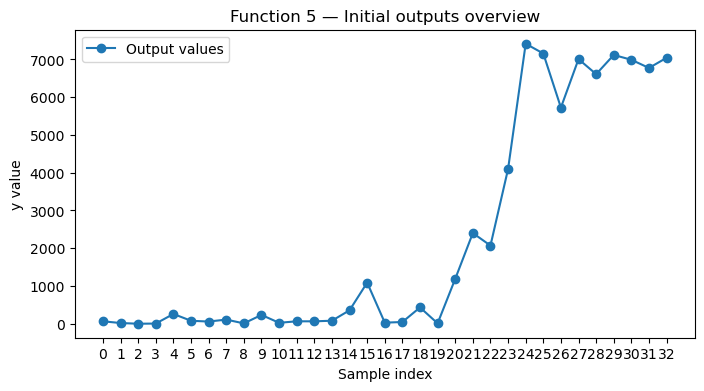

In [2]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(y)), y, 'o-', label='Output values')
plt.xticks(range(len(y)))  # show 0, 1, 2, 3, ...
plt.xlabel("Sample index")
plt.ylabel("y value")
plt.title("Function 5 — Initial outputs overview")
plt.legend()
plt.show()

## Bayesian Optimisation

In [4]:
# GP setup
kernel = (ConstantKernel(1.0, (1e-2, 1e2)) *
          Matern(length_scale=np.ones(d), nu=2.5) +  # smoother since unimodal
          WhiteKernel(noise_level=1e-3, noise_level_bounds=(1e-6, 1e-1)))

gp = GaussianProcessRegressor(
    kernel=kernel,
    normalize_y=True,
    n_restarts_optimizer=8,
    random_state=42
)
gp.fit(X, y)

# Sobol candidate set in [0,1]^4
sob = Sobol(d=d, scramble=True, seed=None)
C = sob.random_base2(m=18)

# Upper Confidence Bound (UCB)
mu, sigma = gp.predict(C, return_std=True)
beta = 0.7
ucb = mu + (beta * sigma)

x_next = C[np.argmax(ucb)]
print("Next point to query:",
      "-".join(f"{x:.6f}" for x in x_next))

Next point to query: 0.999289-0.950782-0.963854-0.995668
